<a href="https://colab.research.google.com/github/szervoudis1/IBM-NYSE-Stock-Price/blob/main/IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ατομική Εργασία - Ζερβούδης Στέφανος - me2009

## IBM-NYSE-Stoke-Price

### Άσκηση 2

1. Να κατεβάσετε από το σύνδεσμο https://finance.yahoo.com/quote/IBM/history?p=IBM τις τιμές μετοχών της IBM για το χρονικό διάστημα από 03-01-1962 έως 08-12-2020.

2. Βρείτε την εκατοστιαία ημερήσια διακύμανση της μετοχής
100 * (Τιμή Ανοίγματος - Τιμή Κλεισίματος) / Τιμή Ανοίγματος και να την προσθέσετε ως καινούργια στήλη σε ένα νέο excel που θα κατασκευάσετε και θα περιέχει το σύνολο των υπολοίπων στηλών του αρχείου που κατεβάσατε.

3. Να κατασκευάσετε ένα ιστόγραμμα το οποίο στον οριζόντιο άξονα θα έχει την εκατοστιαία ημερήσια διακύμανση (βήμα = 0.1%) και στον κατακόρυφο το πλήθος των ημερών κατά τις οποίες παρατηρήθηκε η παραπάνω διακύμανση. Στο ίδιο διάγραμμα να απεικονίζονται οι μέγιστες και ελάχιστες τιμές διακύμανσης και η τελευταία ημερομηνία στις οποίες παρατηρήθηκαν αυτές.

4. Να κατασκευάσετε ένα μοντέλο που αντιστοιχεί στην παραπάνω κατανομή και να απεικονίσετε την κατανομή του μοντέλου στο ίδιο ιστόγραμμα. Διαλέξτε την καταλληλότερη κατανομή για τα δεδομένα σας.

5. Αυτοματοποιήστε την παραπάνω διαδικασία ώστε το πρόγραμμα σας να δέχεται σαν είσοδο το όνομα μιας μετοχής και να πραγματοποιεί αυτόματα την παραπάνω αναζήτηση στο δίκτυο και την ανάλυση (μπορείτε να χρησιμοποιήσετε οποιαδήποτε έγκυρη δικτυακή πηγή για τις τιμές των μετοχών).


## Ερώτημα 1
---
Να κατεβάσετε από το σύνδεσμο https://finance.yahoo.com/quote/IBM/history?p=IBM τις τιμές μετοχών της IBM για το χρονικό διάστημα από 03-01-1962 έως 08-12-2020.

```
Please unmark ' # ' if you want to import your data with Google.Colab !! 
```
```
from google.colab import files
files.upload()
```

In [1]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.lines as mlines

from google.colab import files
#files.upload()

In [2]:
# Διαβάζουμε το αρχείο IBM.csv
df = pd.read_csv("IBM.csv",sep=",")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.867095,288000
1,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.848488,256000
2,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.812086,363200
3,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.778110,544000
4,1962-01-09,7.360000,7.506667,7.360000,7.413333,1.799143,491200


## Ερώτημα 2
---
Βρείτε την εκατοστιαία ημερήσια διακύμανση της μετοχής 100 * (Τιμή Ανοίγματος - Τιμή Κλεισίματος) / Τιμή Ανοίγματος και να την προσθέσετε ως καινούργια στήλη σε ένα νέο excel που θα κατασκευάσετε και θα περιέχει το σύνολο των υπολοίπων στηλών του αρχείου που κατεβάσατε.

In [3]:
# Υπολογισμός της ημερήσιας διακύμανσης της μετοχής
df["Day_Var"] = ((df["Open"] - df["Close"]) / df["Open"])* 100


In [4]:
# Δημιουργία ενός νέου αρχείου 'New Data.xlsx' όπου θα έχει και την στήλή
# της ημερήσιας διακύμανσης της μετοχής
writer = pd.ExcelWriter('New Data.xlsx')
df.to_excel(writer, sheet_name = 'Day Var' , index = False)
writer.save()


In [5]:
# Διαβάζουμε το νέο αρχείο 'New Data.xlsx'
pd.read_excel('New Data.xlsx', index_col=0)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Day_Var
0,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.867095,288000,-0.874117
1,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.848488,256000,0.996525
2,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.812086,363200,1.840491
3,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.778110,544000,1.787306
4,1962-01-09,7.360000,7.506667,7.360000,7.413333,1.799143,491200,-0.724633


## Ερώτημα 3
---
Να κατασκευάσετε ένα ιστόγραμμα το οποίο στον οριζόντιο άξονα θα έχει την εκατοστιαία ημερήσια διακύμανση (βήμα = 0.1%) και στον κατακόρυφο το πλήθος των ημερών κατά τις οποίες παρατηρήθηκε η παραπάνω διακύμανση. Στο ίδιο διάγραμμα να απεικονίζονται οι μέγιστες και ελάχιστες τιμές διακύμανσης και η τελευταία ημερομηνία στις οποίες παρατηρήθηκαν αυτές.

In [6]:
date = df['Date']
# date

day_var = df['Day_Var']
# day_var


In [7]:
# Υπολογίζουμε την μέγιστη τιμή του df["Day_Var"]
xmax = df["Day_Var"].max()
xmax


23.51851851851852

In [8]:
# Υπολογίζουμε την ελάχιστη τιμή του df["Day_Var"]
xmin = df["Day_Var"].min()
xmin


-12.985074626865673

 Η διαμέρηση έχει bins =  365

 H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :

            Date   Open  High   Low    Close  Adj Close    Volume    Day_Var
6483  1987-10-19  33.75  34.5  25.0  25.8125   11.62007  25497600  23.518519

 H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :

            Date   Open  High    Low   Close  Adj Close    Volume    Day_Var
9821  2001-01-03  83.75  95.0  83.75  94.625  59.501057  12769900 -12.985075


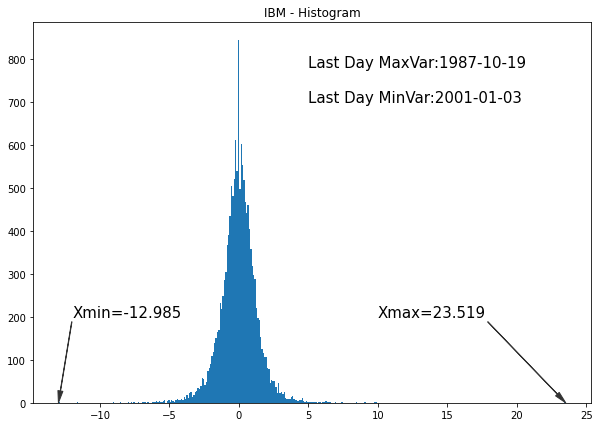

In [9]:
# Υπολογίζουμε τον αριθμό bins που θέλουμε να διαμερίσουμε τα δεδομένα μας
# Στην περίπτωσή μας θέλουμε να διαμερίσουμε το διάστημα ανά 0.1
bins = (df['Day_Var'].max() - df['Day_Var'].min()) * 10
bins = int(bins)
print(" Η διαμέρηση έχει bins = ",bins)

# Κάνουμε sort-->ascending τα δεδομένα μας σε περίπτωση που έχουμε την ίδια
# μέγιστη ή ελάχιστη τιμή σε μια ημέρα
date =df.sort_values(by=['Day_Var','Date'],ascending=False)

# Μέγεθος Διαγράμματος
plt.figure(figsize=(10,7))

# Εντοπίζουμε την τελευταία μέρα με την μεγαλύτερη & μικρότερη διακύμαση 
max_day = date[:1]
min_day = date[-1:]
print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :\n\n{max_day}')
print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :\n\n{min_day}')

# Τίτλος Xmin - Xmax στο γράφημα  
plt.annotate(f'Xmax={round(xmax,3)}', xy=(xmax,0), xytext=(10, 200), fontsize=15,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

plt.annotate(f'Xmin={round(xmin,3)}', xy=(xmin,0), xytext=(-12, 200), fontsize=15,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

# Τίτλος Ημερομηνίας στο γράφημα    
max_day = list(df.iloc[df['Day_Var'].argmax()])
min_day = list(df.iloc[df['Day_Var'].argmin()])
plt.text(5,700,"Last Day MaxVar:" + max_day[0] +"\n" + "\nLast Day MinVar:"+ min_day[0],fontsize=15)

# Plotting Histogram
plt.title("ΙΒΜ - Histogram")
plt.hist((day_var),bins=bins)
plt.show()


## Ερώτημα 4
---
Να κατασκευάσετε ένα μοντέλο που αντιστοιχεί στην παραπάνω κατανομή και να απεικονίσετε την κατανομή του μοντέλου στο ίδιο ιστόγραμμα. Διαλέξτε την καταλληλότερη κατανομή για τα δεδομένα σας.

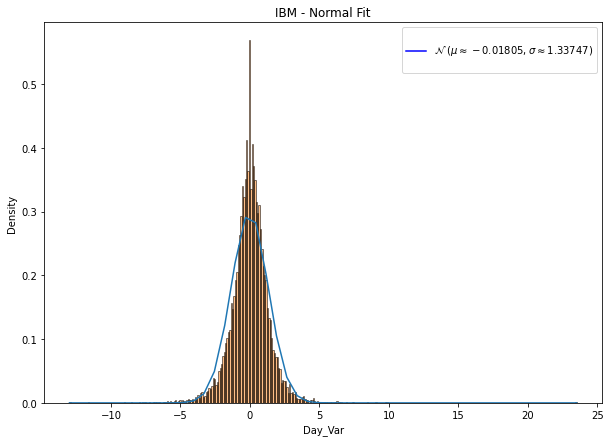

In [10]:
# Υπολογσιμός Standard Deviation & Mean
std = np.std(df['Day_Var'],ddof=1)
mean = np.mean(df['Day_Var'])

# or
# mean,std = norm.fit(df['Day_Var'])

plt.figure(figsize=(10,7))

# Title box with blue line
blue_line = mlines.Line2D([], [], color='blue', marker='',markersize=15,
                        label= "\n" + '$\mathcal{N}$ ' +  
                        f'$( \mu  \\approx {round((mean),5)} , \
                           \sigma  \\approx {round((std),5)} )$\n')

plt.legend(handles=[blue_line])

# Plotting Normal Distribution and Histogram

domain = np.linspace(xmin,xmax)
plt.plot(domain,norm.pdf(domain,mean,std))

plt.hist(df['Day_Var'], edgecolor = 'black',alpha=0.5,bins=bins, density=True)
plt.title("IBM - Normal Fit")
plt.xlabel("Day_Var")
plt.ylabel("Density")
plt.show()


## Ερώτημα 5
---
Αυτοματοποιήστε την παραπάνω διαδικασία ώστε το πρόγραμμα σας να δέχεται σαν είσοδο το όνομα μιας μετοχής και να πραγματοποιεί αυτόματα την παραπάνω αναζήτηση στο δίκτυο και την ανάλυση (μπορείτε να χρησιμοποιήσετε οποιαδήποτε έγκυρη δικτυακή πηγή για τις τιμές των μετοχών).

In [11]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

start = datetime.datetime(1980,1,1)
stop = datetime.datetime(2020,1,1)

print("\n---------------------------------------------\n\
*** Please fill find below IBM or S&P 500 Stock Rates {1980 - 2020}\
\n---------------------------------------------\n ")

print("\n For IBM Rates please write : IBM\n For S&P500 Rates please write : SPY")

Stock_name = input("Insert a Stock - Name :")

print("\n---------------------------------------------\n\
*** Please wait few sec for the downloading of the data\
\n---------------------------------------------\n ")

while Stock_name != 'IBM'and Stock_name != 'SPY' :
    Stock_name = input("Insert a stock :")

if  Stock_name == 'IBM':
    
    # Κατεβάζουμε τα την μετοχή που θέλουμε από YAHOU, μέσω της  
    df1 = web.DataReader("IBM",'yahoo',start,stop)
    df1.to_csv('IBM - Rates.csv')
    print("\n------- IBM - Rates.csv has been downloaded correctly ! -------") 
        
    df1 = pd.read_csv('IBM - Rates.csv',sep=",")
    df1.head() 

    df1["Day_Var"] = ((df1["Open"] - df1["Close"]) / df1["Open"])* 100

    writer = pd.ExcelWriter('New Data IBM.xlsx')
    df1.to_excel(writer, sheet_name = 'Day Var' , index = False)
    writer.save()    
     
    pd.read_excel('New Data IBM.xlsx', index_col=0)
    df1.head()

elif  Stock_name == 'SPY':
   
    df1 = web.DataReader("SPY",'yahoo',start,stop)
    df1.to_csv('SPY - Rates.csv')
    print("\n SPY - Rates.csv has been downloaded correctly !!!")
     
    df1 = pd.read_csv('SPY - Rates.csv',sep=",")
    df1.head() 
    
    df1["Day_Var"] = ((df1["Open"] - df1["Close"]) / df1["Open"])* 100

    writer = pd.ExcelWriter('New Data SPY.xlsx')
    df1.to_excel(writer, sheet_name = 'Day Var' , index = False)
    writer.save()    
     
    pd.read_excel('New Data SPY.xlsx', index_col=0)
    df1.head()        



---------------------------------------------
*** Please fill find below IBM or S&P 500 Stock Rates {1980 - 2020}
---------------------------------------------
 

 For IBM Rates please write : IBM
 For S&P500 Rates please write : SPY
Insert a Stock - Name :SPY

---------------------------------------------
*** Please wait few sec for the downloading of the data
---------------------------------------------
 

 SPY - Rates.csv has been downloaded correctly !!!


 Η διαμέρηση έχει bins =  182

 H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :

            Date   Open  High   Low    Close  Adj Close    Volume    Day_Var
6483  1987-10-19  33.75  34.5  25.0  25.8125   11.62007  25497600  23.518519

 H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :

            Date   Open  High    Low   Close  Adj Close    Volume    Day_Var
9821  2001-01-03  83.75  95.0  83.75  94.625  59.501057  12769900 -12.985075


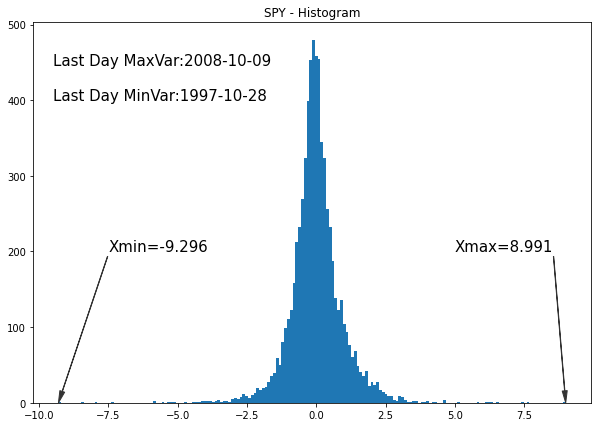

In [12]:
if Stock_name == "IBM":
    x1 = (10,200)
    x2 = (-12,200)
    z1 = 5
    z2 = 400    
elif Stock_name == "SPY":
    x1 = (5,200)
    x2 = (-7.5,200)
    z1 = -9.5
    z2 = 400

# Υπολογίζουμε την μέγιστη τιμή του df["Day_Var"]
xmax = df1["Day_Var"].max()
xmax

# Υπολογίζουμε την ελάχιστη τιμή του df["Day_Var"]
xmin = df1["Day_Var"].min()
xmin

# Υπολογίζουμε τον αριθμό bins που θέλουμε να διαμερίσουμε τα δεδομένα μας
# Στην περίπτωσή μας θέλουμε να διαμερίσουμε το διάστημα ανά 0.1
bins = (df1['Day_Var'].max() - df1['Day_Var'].min()) * 10
bins = int(bins)
print(" Η διαμέρηση έχει bins = ",bins)

# Κάνουμε sort-->ascending τα δεδομένα μας σε περίπτωση που έχουμε την ίδια
# μέγιστη ή ελάχιστη τιμή σε μια ημέρα
date =df.sort_values(by=['Day_Var','Date'],ascending=False)

# Μέγεθος Διαγράμματος
plt.figure(figsize=(10,7))

# Εντοπίζουμε την τελευταία μέρα με την μεγαλύτερη & μικρότερη διακύμαση 
max_day = date[:1]
min_day = date[-1:]
print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :\n\n{max_day}')
print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :\n\n{min_day}')

# Τίτλος Xmin - Xmax στο γράφημα  
plt.annotate(f'Xmax={round(xmax,3)}', xy=(xmax,0), xytext=x1, fontsize=15,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

plt.annotate(f'Xmin={round(xmin,3)}', xy=(xmin,0), xytext=x2, fontsize=15,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})
  
# Τίτλος Ημερομηνίας στο γράφημα    
max_day = list(df1.iloc[df1['Day_Var'].argmax()])
min_day = list(df1.iloc[df1['Day_Var'].argmin()])
plt.text(z1,z2,"Last Day MaxVar:" + max_day[0] +"\n" + "\nLast Day MinVar:"+ min_day[0],fontsize=15)

# Plotting Histogram
plt.title(f'{Stock_name}' + " - Histogram")
plt.hist(df1['Day_Var'],bins=bins)
plt.show()


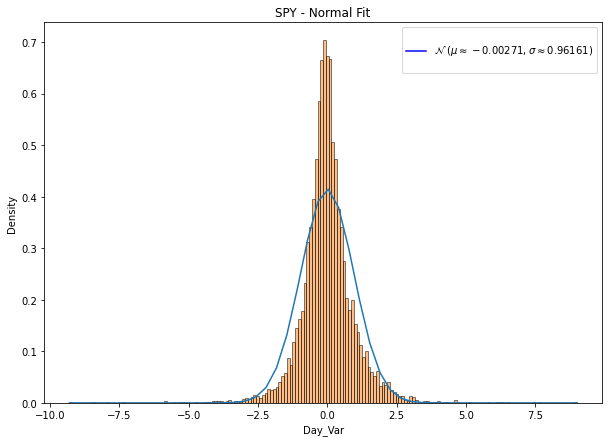

In [13]:
# Υπολογσιμός Standard Deviation & Mean
std = np.std(df1['Day_Var'],ddof=1)
mean = np.mean(df1['Day_Var'])

plt.figure(figsize=(10,7))

# Plotting Normal Distribution and Histogram
domain = np.linspace(np.min(df1['Day_Var']),np.max(df1['Day_Var']))
plt.plot(domain,norm.pdf(domain,mean,std))
plt.hist(df1['Day_Var'], edgecolor = 'black',alpha=0.5,bins=bins, density=True)
plt.title(f'{Stock_name}' + " - Normal Fit")
plt.xlabel("Day_Var")
plt.ylabel("Density")

# Title box with blue line
blue_line = mlines.Line2D([], [], color='blue', marker='',markersize=15,
                        label= "\n" + '$\mathcal{N}$ ' +  
                        f'$( \mu  \\approx {round((mean),5)} , \
                           \sigma  \\approx {round((std),5)} )$\n')
plt.legend(handles=[blue_line])
plt.show()
